# Aula 13 - ANÁLISE UNIVARIADA

notebook de exemplo: https://www.kaggle.com/code/residentmario/univariate-plotting-with-pandas

dados: https://www.kaggle.com/datasets/rounakbanik/pokemon?datasetId=2756&sortBy=voteCount

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
pd.set_option('display.max_columns', 500)

### Abrindo a base

In [18]:
pokemon = pd.read_csv("../bases/pokemon.csv")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Base info

In [19]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [20]:
pokemon.describe().round(2)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,781.00,801.00,703.00,801.00,801.00,801.00,801.00,781.00,801.00,801.00
mean,1.00,1.06,0.97,1.07,1.07,1.07,1.14,1.19,0.99,1.03,1.10,1.21,0.89,0.98,1.01,1.25,0.98,1.06,77.86,7191.01,65.36,428.38,73.01,1054995.91,1.16,68.96,55.16,401.00,71.31,70.91,66.33,61.38,3.69,0.09
std,0.60,0.44,0.35,0.65,0.52,0.72,0.69,0.60,0.56,0.79,0.74,0.74,0.27,0.55,0.50,0.70,0.50,0.61,32.16,6558.22,19.60,119.20,30.77,160255.84,1.08,26.58,20.26,231.37,32.35,27.94,28.91,109.35,1.93,0.28
min,0.25,0.25,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.25,0.25,5.00,1280.00,0.00,180.00,5.00,600000.00,0.10,1.00,0.00,1.00,10.00,20.00,5.00,0.10,1.00,0.00
25%,0.50,1.00,1.00,0.50,1.00,0.50,0.50,1.00,1.00,0.50,1.00,0.50,1.00,0.50,1.00,1.00,0.50,0.50,55.00,5120.00,70.00,320.00,50.00,1000000.00,0.60,50.00,50.00,201.00,45.00,50.00,45.00,9.00,2.00,0.00
50%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,75.00,5120.00,70.00,435.00,70.00,1000000.00,1.00,65.00,50.00,401.00,65.00,66.00,65.00,27.30,4.00,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,100.00,6400.00,70.00,505.00,90.00,1059860.00,1.50,80.00,50.00,601.00,91.00,90.00,85.00,64.80,5.00,0.00
max,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00,4.00,4.00,4.00,4.00,4.00,185.00,30720.00,140.00,780.00,230.00,1640000.00,14.50,255.00,100.00,801.00,194.00,230.00,180.00,999.90,7.00,1.00


# Análise Univariada

In [9]:
col = 'hp'
#dataframe com somente uma coluna 
pokemon_col = pokemon.loc[:,[col]]
pokemon_col

,hp
0,45
1,60
2,80
3,39
4,58
...,...
796,97
797,59
798,223
799,97


In [10]:
#quebra em 10 faixas
pokemon_col['decil'] = pd.qcut(pokemon_col[col], 10, labels=False)
pokemon_col

,hp,decil
0,45,1
1,60,3
2,80,7
3,39,0
4,58,3
...,...,...
796,97,8
797,59,3
798,223,9
799,97,8


In [11]:
#agrupa por cada faixa 
pokemon_col_agg = pokemon_col.groupby('decil').agg({col: ['min', 'max', 'count']})
pokemon_col_agg = pokemon_col_agg[col].reset_index()
#ordena 
pokemon_col_agg = pokemon_col_agg.sort_values('decil')
pokemon_col_agg

,decil,min,max,count
0,0,1,40,94
1,1,41,48,67
2,2,49,55,102
3,3,56,60,85
4,4,61,65,63
5,5,66,70,74
6,6,71,78,83
7,7,79,86,76
8,8,88,100,94
9,9,101,255,63


In [12]:
#comulativa
pokemon_col_agg['count_acu'] = pokemon_col_agg['count'].cumsum()
pokemon_col_agg

,decil,min,max,count,count_acu
0,0,1,40,94,94
1,1,41,48,67,161
2,2,49,55,102,263
3,3,56,60,85,348
4,4,61,65,63,411
5,5,66,70,74,485
6,6,71,78,83,568
7,7,79,86,76,644
8,8,88,100,94,738
9,9,101,255,63,801


In [13]:
#porcentagens 
pokemon_col_agg['freq']     = (100*pokemon_col_agg['count']/pokemon_col_agg['count'].sum()).round(2)
pokemon_col_agg['freq_acu'] = (100*pokemon_col_agg['count_acu']/pokemon_col_agg['count'].sum()).round(2)
pokemon_col_agg

,decil,min,max,count,count_acu,freq,freq_acu
0,0,1,40,94,94,11.74,11.74
1,1,41,48,67,161,8.36,20.10
2,2,49,55,102,263,12.73,32.83
3,3,56,60,85,348,10.61,43.45
4,4,61,65,63,411,7.87,51.31
5,5,66,70,74,485,9.24,60.55
6,6,71,78,83,568,10.36,70.91
7,7,79,86,76,644,9.49,80.40
8,8,88,100,94,738,11.74,92.13
9,9,101,255,63,801,7.87,100.00


### Plot

<BarContainer object of 18 artists>

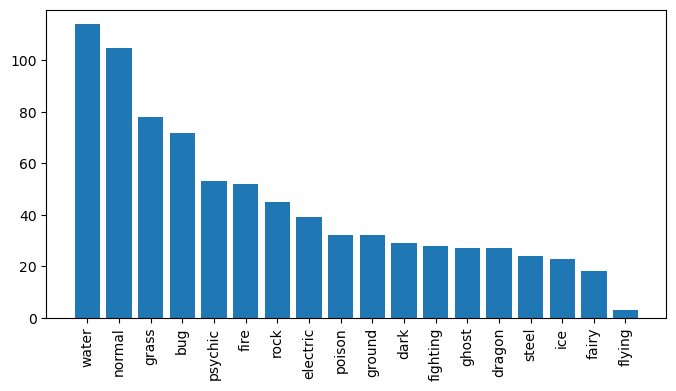

In [14]:
fig, ax = plt.subplots(figsize=(8,4))

type1 = pokemon.type1.value_counts()

plt.xticks(rotation=90)
ax.bar(type1.index, type1.values)


<AxesSubplot:>

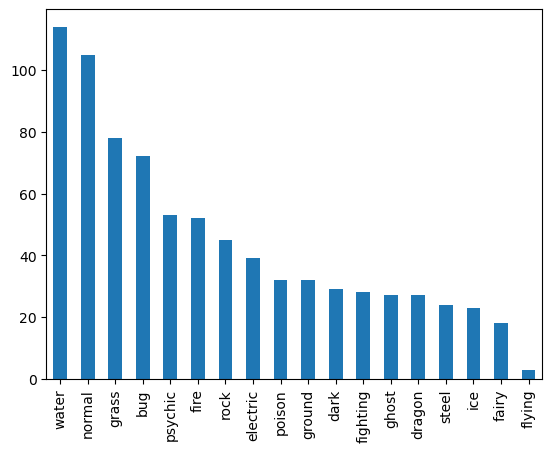

In [15]:
#podemos fazer de forma mais direta utilizando as funcoes do pandas ;)
pokemon['type1'].value_counts().plot.bar()